In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from os import listdir
from os.path import join, exists
import matplotlib

In [2]:
def order_columns(column_names):
    column_names = sorted(column_names, key=lambda x: int(x.split('-')[-1]) + 100 if 'classifier' in x else int(x.split('-')[-1])) 
    column_names.remove
    return column_names

def extract_layer_saturation(df, excluded = 'classifier-6', epoch=19):
    df = df.reindex(sorted(df.columns), axis=1)
    cols = list(df.columns)
    #print(cols)
    train_cols = [col for col in cols if 'train' in col and not excluded in col and not 'accuracy' in col and not 'loss' in col]
    train_cols = order_columns(train_cols)
    
    #print(list(train_cols))
    epoch_df = df[df.index.values == epoch]
    accuray = epoch_df['test_accuracy'].values[0]
    epoch_df = epoch_df[train_cols]
    
    return epoch_df, accuray

In [3]:
def plot_saturation_level(df, title=''):
    cols = list(df.columns)
    col_names = ['Layer {}'.format(i+1) for i in range(len(df.columns))]
    plt.figure(figsize=(7,5))
    plt.grid()
    plt.bar(list(range(len(cols))), df.values[0])
    plt.xticks(list(range(len(cols))), col_names, rotation='vertical', fontsize=16)
    plt.ylim((0,100))
    plt.yticks(fontsize=16)
    plt.xlabel('Layers', fontsize=16)
    plt.title(title, fontsize=16)
    plt.ylabel('Saturation in %', rotation='vertical', fontsize=16)
    plt.show()
    
def plot_saturation_level_ax(df, ax, acc=-1):
    cols = list(df.columns)
    col_names = [i+1 for i in range(len(df.columns))]
    ax.grid()
    ax.bar(list(range(len(cols))), df.values[0])
    ax.set_xticks([])
    ax.set_ylim((0,100))
    ax.text(1, 80, 'Accuray: {}'.format(acc))
    #plt.yticks(fontsize=16)
    #plt.xlabel('Layers', fontsize=16)
    #plt.title(title, fontsize=16)
    #plt.ylabel('Saturation in %', rotation='vertical', fontsize=16)_

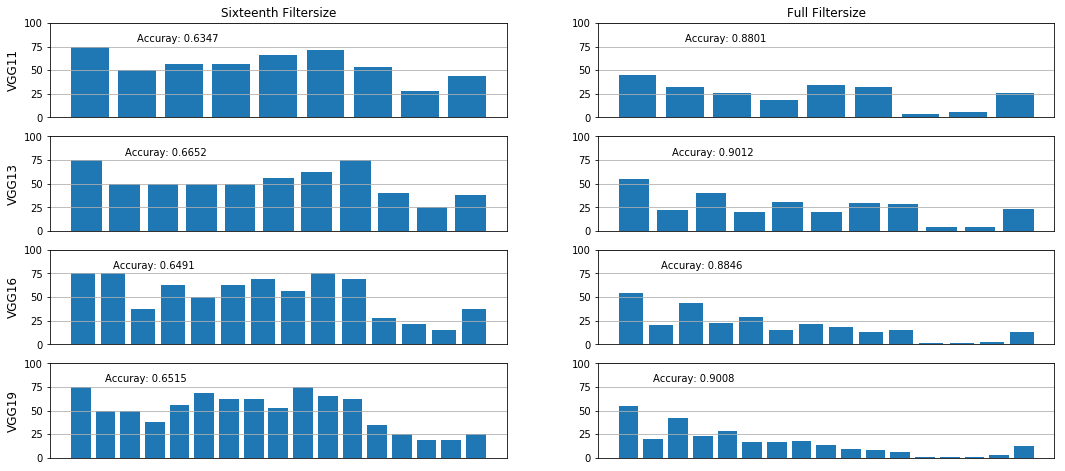

In [6]:
import matplotlib.pyplot as plt
batch_size = 32
identifier = '2'
cols = ['{} Filtersize'.format(col) for col in reversed(['Full', 'Sixteenth'])]
rows = ['{}'.format(row) for row in ['VGG11', 'VGG13', 'VGG16', 'VGG19']]

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 8))
for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation='vertical', size='large')

    

#fig.tight_layout()
for i,net in enumerate([11, 13, 16, 19]):
    for j,filterstack in enumerate(reversed(['', '_XXXS'])):
        filename = join('.','logs','VGG{}{}'.format(net, filterstack),'Cifar10','VGG{}{}_bs{}_e20_id{}.csv'.format(net, filterstack, batch_size, identifier))
        #print(filename)
        df, acc = extract_layer_saturation(pd.read_csv(filename, sep=';'), epoch=19)
        plot_saturation_level_ax(df, axes[i][j], acc)
plt.show()
#plt.savefig('collage_cifar.eps')

Files already downloaded and verified
Files already downloaded and verified
Running vgg11_XXXS
torch.Size([960, 32, 32, 4]) torch.Size([960, 32, 32, 4])
torch.Size([960, 16, 16, 8]) torch.Size([960, 16, 16, 8])
torch.Size([960, 8, 8, 16]) torch.Size([960, 8, 8, 16])
torch.Size([960, 8, 8, 16]) torch.Size([960, 8, 8, 16])
torch.Size([960, 4, 4, 32]) torch.Size([960, 4, 4, 32])
torch.Size([960, 4, 4, 32]) torch.Size([960, 4, 4, 32])
torch.Size([960, 2, 2, 32]) torch.Size([960, 2, 2, 32])
torch.Size([960, 2, 2, 32]) torch.Size([960, 2, 2, 32])
torch.Size([960, 16]) torch.Size([960, 16])
torch.Size([960, 10]) torch.Size([960, 10])
Running vgg11
torch.Size([960, 32, 32, 64]) torch.Size([960, 32, 32, 64])


/home/amahon/research/svcca/cca_core.py:55: RuntimeWarning: invalid value encountered in sqrt
  wsqrt = np.sqrt(w)


torch.Size([960, 16, 16, 128]) torch.Size([960, 16, 16, 128])
torch.Size([960, 8, 8, 256]) torch.Size([960, 8, 8, 256])
torch.Size([960, 8, 8, 256]) torch.Size([960, 8, 8, 256])
torch.Size([960, 4, 4, 512]) torch.Size([960, 4, 4, 512])
torch.Size([960, 4, 4, 512]) torch.Size([960, 4, 4, 512])
torch.Size([960, 2, 2, 512]) torch.Size([960, 2, 2, 512])
torch.Size([960, 2, 2, 512]) torch.Size([960, 2, 2, 512])
torch.Size([960, 256]) torch.Size([960, 256])
torch.Size([960, 10]) torch.Size([960, 10])
Running vgg13_XXXS
torch.Size([960, 32, 32, 4]) torch.Size([960, 32, 32, 4])
torch.Size([960, 32, 32, 4]) torch.Size([960, 32, 32, 4])
torch.Size([960, 16, 16, 8]) torch.Size([960, 16, 16, 8])
torch.Size([960, 16, 16, 8]) torch.Size([960, 16, 16, 8])
torch.Size([960, 8, 8, 16]) torch.Size([960, 8, 8, 16])
torch.Size([960, 8, 8, 16]) torch.Size([960, 8, 8, 16])
torch.Size([960, 4, 4, 32]) torch.Size([960, 4, 4, 32])
torch.Size([960, 4, 4, 32]) torch.Size([960, 4, 4, 32])
torch.Size([960, 2, 2, 32

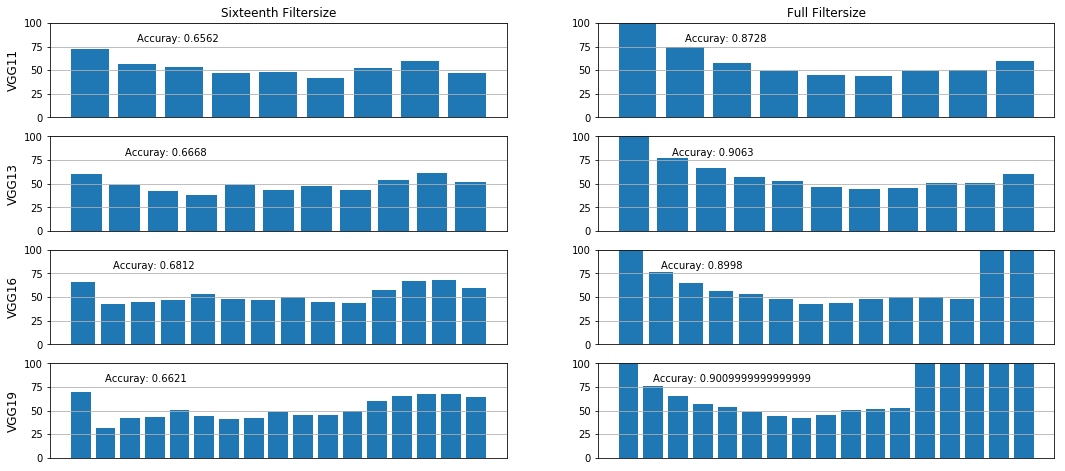

In [5]:
import sys
sys.path.append('../delve')
sys.path.append('../svcca')

import cca_core

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from run import parse_model, parse_dataset
import numpy as np
import gc
batch_size = 32
identifier = '1'
device = 'cuda'
cols = ['{} Filtersize'.format(col) for col in reversed(['Full', 'Sixteenth'])]
rows = ['{}'.format(row) for row in ['VGG11', 'VGG13', 'VGG16', 'VGG19']]

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 8))
for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation='vertical', size='large')

train_loader, test_loader, shape, num_classes = parse_dataset('Cifar10', batch_size)

svcca_coefficients = {}

#fig.tight_layout()
for i,net in enumerate([11, 13, 16, 19]):
    for j,filterstack in enumerate(reversed(['', '_XXXS'])):
        model_name = "vgg{}{}".format(net, filterstack)
        print("Running {}".format(model_name))

        svcca_coefficients[model_name] = list()
        
        filename = join('.','logs','VGG{}{}'.format(net, filterstack),'Cifar10','VGG{}{}_bs{}_e20_id{}.csv'.format(net, filterstack, batch_size, identifier))
        filename1 = join('.','logs','VGG{}{}'.format(net, filterstack),'Cifar10','VGG{}{}_bs{}_e20_id{}.model'.format(net, filterstack, batch_size, 1))
        filename2 = join('.','logs','VGG{}{}'.format(net, filterstack),'Cifar10','VGG{}{}_bs{}_e20_id{}.model'.format(net, filterstack, batch_size, 2))
        model1 = parse_model(model_name, shape, num_classes)
        model2 = parse_model(model_name, shape, num_classes)
        model1.load_state_dict(torch.load(filename1))
        model2.load_state_dict(torch.load(filename2))
        
        model1.eval()
        model2.eval()

        max_index = 0
        for layer in model1.children():
            for sublayer in layer.children():
                if not (isinstance(sublayer, nn.Conv2d) or isinstance(sublayer, nn.Linear)):
                        continue
                max_index += 1

        for current_index in range(max_index):
            hooks = list()

            def hook(module, input, output):
                if len(output.shape) == 4:
                    #shape = output.shape[0:2]
                    #shape = torch.Size([*list(shape), output.shape[2] * output.shape[3]])
                    output = output.permute(0,3,2,1)
                #elif len(output.shape) == 2:
                #    shape = output.shape
                #else:
                #    shape = output.shape
                #    print("Unknown shape")
                #print(shape, 'shape')
                #output = output.reshape(shape)


                if module.layer_output is None:
                    module.layer_output = output
                else:
                    module.layer_output = torch.cat((module.layer_output, output), 0)
                    pass
                #print(output_model1.shape)
            
            index = 0
            for layer in model1.children():
                for sublayer in layer.children():
                    if not (isinstance(sublayer, nn.Conv2d) or isinstance(sublayer, nn.Linear)):
                        continue
                    sublayer.layer_output = None
                    if index == current_index:
                        hooks.append(sublayer.register_forward_hook(hook))
                        layer1 = sublayer
                    sublayer.foo = index
                    index += 1
        
            index = 0
            for layer in model2.children():
                for sublayer in layer.children():
                    if not (isinstance(sublayer, nn.Conv2d) or isinstance(sublayer, nn.Linear)):
                        continue
                    sublayer.layer_output = None
                    if index == current_index:
                        hooks.append(sublayer.register_forward_hook(hook))
                        layer2 = sublayer
                    sublayer.foo = index
                    index += 1
                    
            gc.collect()


            #model1(torch.zeros(9,3,32,32))
            #print("Bar!")
            for batch, data in enumerate(test_loader):
                inputs, labels = data
                #inputs, labels = inputs.to(device), labels.to(device)
                model1(inputs)
                model2(inputs)
                if batch >= 29:
                    break
            
            print(layer1.layer_output.shape, layer2.layer_output.shape)
            if len(layer1.layer_output.shape) == 4:
                num_datapoints, h, w, channels = layer1.layer_output.shape
                f_acts1 = layer1.layer_output.reshape((num_datapoints*h*w, channels)).detach()
                f_acts2 = layer2.layer_output.reshape((num_datapoints*h*w, channels)).detach()
            else:
                f_acts1 = layer1.layer_output.detach()
                f_acts2 = layer2.layer_output.detach()
            
            #print(f_acts1.numpy().shape, f_acts2.numpy().shape)
                
            with torch.no_grad():
                try:
                    f_results = cca_core.get_cca_similarity(f_acts1.numpy().T, f_acts2.numpy().T, epsilon=1e-10, verbose=False)
                    result = np.mean(f_results["cca_coef1"])
                except ValueError as e:
                    #print(e)
                    result = 1
                
            #print(result, "result")
            svcca_coefficients[model_name].append(result * 100)

            for hook_fn in hooks:
                hook_fn.remove()
                
                    
            f_acts1 = None
            f_acts2 = None
            layer1.layer_output = None
            layer2.layer_output = None
            gc.collect()
            
            
        df, acc = extract_layer_saturation(pd.read_csv(filename, sep=';'), epoch=19)
        for idx in range(len(df.values[0])):
            df.values[0][idx] = svcca_coefficients[model_name][idx]
        plot_saturation_level_ax(df, axes[i][j], acc)

plt.show()